In [6]:
import numpy as np
import rioxarray
from rasterio.enums import Resampling
from osgeo import gdal
import os

In [9]:
mds_file = 'data/raster/MDS_sampa-ZSTD.tif'
mds_file_20 = 'data/raster/MDS_sampa-ZSTD-20m.tif'

In [11]:
os.system(f'gdalwarp -tr 20.0 20.0 -r average -of GTiff -overwrite {mds_file} {mds_file_20}')

Creating output file that is 2400P x 3673L.
Processing data/raster/MDS_sampa-ZSTD.tif [1/1] : 0Using internal nodata values (e.g. nan) for image data/raster/MDS_sampa-ZSTD.tif.
Copying nodata values from source data/raster/MDS_sampa-ZSTD.tif to destination data/raster/MDS_sampa-ZSTD-20m.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


0

In [3]:
ds = gdal.Warp(mds_file_20, mds_file, xRes=20, yRes=20, resampleAlg="average", format='GTiff',  multithread=False)

In [12]:
mds = rioxarray.open_rasterio(mds_file_20, chunks=1000, lock=False, cache=False)

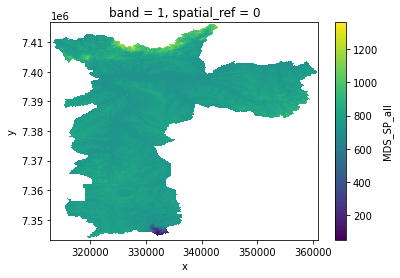

In [13]:
mds.plot()

In [41]:
mds_std = 60 # 3 X o STD parece um bom chute para SP

In [42]:
max_horizontal_distance = 10000
max_vertical_distance = 3 * mds_std
thetas = 40
phis = 8
delta_theta = 2*np.pi/thetas
resolution = 0.5
phis_angles = np.arcsin(np.arange(1/phis/2 + 1/phis, 1, 1/phis))
tangents = 1/np.tan(phis_angles) #CoTangente
# indices = np.indices(xds.rio.shape)

In [26]:
pad_max_meters = np.ceil((tangents[::-1] * max_vertical_distance))
pad_max_meters

array([ 67., 130., 191., 265., 370., 548., 943.])

In [35]:
downscales = np.floor(tangents[::-1])
downscales = np.where(downscales == 0, 1, downscales)
downscales

array([1., 1., 1., 1., 2., 3., 5.])

In [38]:
pad_max_meters / downscales

array([ 67.        , 130.        , 191.        , 265.        ,
       185.        , 182.66666667, 188.6       ])

In [11]:
np.rad2deg(phis_angles)

array([10.80692287, 18.20995686, 25.94447977, 34.22886633, 43.43253656,
       54.3409123 , 69.63586519])